In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [50]:
img_names = [name[:-4] for name in os.listdir('../pancreas/backup1-seg-dataset/imgs')]

In [51]:
img_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup1-seg-dataset/imgs/'
tumor_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup1-seg-dataset/tumor/'
pancreas_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup1-seg-dataset/pancreas/'
result_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup1-seg-dataset/results'

In [52]:
color_map = {'pancreas':[255,0,0], 'tumor':[0,0,255]}

In [53]:
len(os.listdir(tumor_path))

13

# 可视化1：叠加显示所有mask的可视化

In [55]:
result1_path = result_path+'1'
if os.path.exists(result1_path):
    import shutil
    shutil.rmtree(result1_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(result1_path)

deleting... Done!


In [56]:
for index,name in enumerate(img_names):
    img = cv2.imread(os.path.join(img_path,name+'.jpg'),0)
    img[0:33,0:245] = 0
    h,w = img.shape[:2]
    
    flag = 0
    #color_mask = np.ones((*img.shape,3))
    color_mask = np.zeros([h, w, 3], np.uint8)
    if os.path.exists(os.path.join(tumor_path,name+'.json')):
        flag = 1
        with open(os.path.join(tumor_path,name+'.json'), "r") as f:
            annos = json.load(f)
            shapes = annos['shapes']
            for shape in shapes:
                label = shape['label']
                color = color_map[label]
                
                points = shape['points']
                points_array = np.array(points, dtype=np.int32)
                color_mask = cv2.fillPoly(color_mask, [points_array], color)
                
    if os.path.exists(os.path.join(pancreas_path,name+'.json')):
        flag = 1
        with open(os.path.join(pancreas_path,name+'.json'), "r") as f:
            annos = json.load(f)
            shapes = annos['shapes']
            for shape in shapes:
                label = shape['label']
                color = color_map[label]
                
                points = shape['points']
                points_array = np.array(points, dtype=np.int32)
                color_mask = cv2.fillPoly(color_mask, [points_array], color)
        
    if flag == 0: continue
    cv2.imwrite(os.path.join(result1_path,str(index)+'.png'),color_mask)

# 可视化2：仅可视化含有tumor的图片的所有mask

In [57]:
tumor_names = [name[:-5] for name in os.listdir(tumor_path)]
result2_path = result_path+'2'

if os.path.exists(result2_path):
    import shutil
    shutil.rmtree(result2_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(result2_path)

for index,name in enumerate(tumor_names):
    img = cv2.imread(os.path.join(img_path,name+'.jpg'),0)
    img[0:33,0:245] = 0
    h,w = img.shape[:2]
    
    flag = 0
    #color_mask = np.ones((*img.shape,3))
    color_mask1 = np.zeros([h, w, 3], np.uint8)
    color_mask2 = np.zeros([h, w, 3], np.uint8)
    if os.path.exists(os.path.join(tumor_path,name+'.json')):
        #flag = 1
        if os.path.exists(os.path.join(pancreas_path,name+'.json')):
            flag = 1
            with open(os.path.join(pancreas_path,name+'.json'), "r") as f:
                annos = json.load(f)
                shapes = annos['shapes']
                for shape in shapes:
                    label = shape['label']
                    color = color_map[label]

                    points = shape['points']
                    points_array = np.array(points, dtype=np.int32)
                    color_mask1 = cv2.fillPoly(color_mask1, [points_array], color)
        with open(os.path.join(tumor_path,name+'.json'), "r") as f:
            annos = json.load(f)
            shapes = annos['shapes']
            for shape in shapes:
                label = shape['label']
                color = color_map[label]
                
                points = shape['points']
                points_array = np.array(points, dtype=np.int32)
                color_mask2 = cv2.fillPoly(color_mask2, [points_array], color)
        
        alpha = 0.6
        if flag == 1:
            color_mask = cv2.addWeighted(color_mask1,1-alpha,color_mask2,alpha,0) #https://blog.csdn.net/zh_jessica/article/details/77992578
        else:
            print('img:%s(index:%d) has no pancreas'%(name,index))
            color_mask = color_mask2

    #if flag == 0: continue
    cv2.imwrite(os.path.join(result2_path,str(index)+'.png'),color_mask)

deleting... Done!
img:AILIKEMU_AP_1.CT.0003.0022.2018.01.06.08.58.26.453125.106165872(index:6) has no pancreas


# 用labelme可视化单个json

<b>这个只能可视化单个json，如果当时标注的时候按照不同类别来得到json时，就不是很方便，此时用上面1和2更方便。<br>
不过一定要记得修改color_map

https://blog.csdn.net/weixin_36670529/article/details/89441110  <br>
1. pip install labelme
2.  labelme_json_to_dataset  path/<文件名>.json

https://github.com/wkentaro/labelme#windows

# 使用matplotlib进行叠加可视化

<b>好处是可以通过alpha通道实现多label mask重叠<br>
    比如你已经有这样一个数据集：图片文件夹+类别1mask图片文件夹+...+类别nmask图片文件夹
    那么你可以通过读取图片之后，在各个类别mask图片文件夹中读取对应的mask，然后通过alpha通道叠加显示

https://www.aiuai.cn/aifarm276.html

https://blog.csdn.net/weixin_43593330/article/details/107676785 

# 阈值分割法

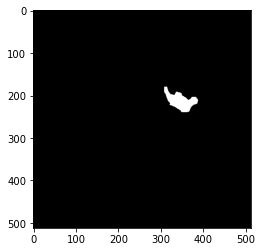

In [120]:
img = cv2.imread('../pancreas/backup2-seg-dataset/imgs/0.jpg')
mask = cv2.imread('../pancreas/backup2-seg-dataset/masks/0_mask.jpg',0)

import matplotlib.pyplot as plt

plt.imshow(mask,cmap='gray')

true_mask = mask.copy()

In [121]:
true_mask.shape

(512, 512)

In [118]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
mask = mask//255

# https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html
# https://www.jianshu.com/p/117f66320589
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Segmentation_by_Foreground_Extraction_Grabcut_Algorithm_based_on_Graph_cuts.php
# https://cloud.tencent.com/developer/article/1400019
seg, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,50,cv2.GC_INIT_WITH_MASK)

seg = np.where((seg==2)|(seg==0),0,255).astype('uint8')

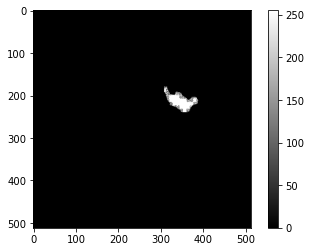

In [123]:
plt.imshow(seg,cmap='gray')
plt.colorbar()

In [124]:
cv2.imwrite('test.png',seg)

True

In [127]:
img_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup2-seg-dataset/imgs/'
mask_path = '/GPUFS/sysu_rxwang_1/defeng/pancreas/backup2-seg-dataset/masks/'
save_path = './traditionalSeg'

if os.path.exists(save_path):
    import shutil
    shutil.rmtree(save_path, ignore_errors=True)
    print("deleting... Done!")
    
os.mkdir(save_path)

for index,name in enumerate(os.listdir(img_path)):
    name = name[:-4]
    img = cv2.imread(os.path.join(img_path,name+'.jpg'))
    mask = cv2.imread(os.path.join(mask_path,name+'_mask.jpg'),0)
    mask = mask//255
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    seg, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,20,cv2.GC_INIT_WITH_MASK)
    
    seg = np.where((seg==2)|(seg==0),0,255).astype('uint8')
    
    cv2.imwrite(os.path.join(save_path,name+'.png'),seg)

deleting... Done!
